# Movie Analysis
Vi undersøger følgende:

1. Hvilke en genre er den som flest film har?
2. Hvilken genre opnår den størst gennemsnitlige indtjening?
3. Hvilken genre opnår den størst gennemsnitlige rating?
4. Hvilke production companies har lavet flest film
5. Hvilket production companies har den største indtjening?
6. Er der en sammenhæng mellem en films budget og dens revenue? (Undersøg med linear regression)
7. Er der en sammenhæng mellem vote-average og profit? (Undersøg med linear regression)
8. Undersøg med et heatmap, hvilke features som har den bedste sammenhæng.
9. Undersøg hvornår en film bliver udgivet på året i forhold til hvor stor indtjening filmen får? Hvilke måned er bedst at udgive en film?
10. Undersøg udvikling i vote-average fra 2000 til 2017.

In [1]:
import modules.analyser.Analyser as an

#### Get and Prepare

In [2]:
data = an.prepare_data()
data.head()

C:\Users\miemt\Desktop\MovieMatch\modules\analyser\Analyser.py:20: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data['release_date'] = pd.to_datetime(data['release_date'])


,budget,genres,id,original_title,popularity,release_date,revenue,runtime,vote_average,vote_count,original_language,production_companies,years,profit
0,30000000.0,Animation,862.0,Toy Story,21.946943,1995-10-30,373554033.0,81.0,7.7,5415.0,en,Pixar Animation Studios,1995,343554033.0
1,65000000.0,Adventure,8844.0,Jumanji,17.015539,1995-12-15,262797249.0,104.0,6.9,2413.0,en,TriStar Pictures,1995,197797249.0
3,16000000.0,Comedy,31357.0,Waiting to Exhale,3.859495,1995-12-22,81452156.0,127.0,6.1,34.0,en,Twentieth Century Fox Film Corporation,1995,65452156.0
5,60000000.0,Action,949.0,Heat,17.924927,1995-12-15,187436818.0,170.0,7.7,1886.0,en,Regency Enterprises,1995,127436818.0
8,35000000.0,Action,9091.0,Sudden Death,5.231580,1995-12-22,64350171.0,106.0,5.5,174.0,en,Universal Pictures,1995,29350171.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5362 entries, 0 to 45422
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   budget                5362 non-null   float64       
 1   genres                5353 non-null   object        
 2   id                    5362 non-null   float64       
 3   original_title        5362 non-null   object        
 4   popularity            5362 non-null   float64       
 5   release_date          5362 non-null   datetime64[ns]
 6   revenue               5362 non-null   float64       
 7   runtime               5362 non-null   float64       
 8   vote_average          5362 non-null   float64       
 9   vote_count            5362 non-null   float64       
 10  original_language     5362 non-null   object        
 11  production_companies  5193 non-null   object        
 12  years                 5362 non-null   int64         
 13  profit           

In [4]:
data.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count,years,profit
count,5.362000e+03,5362.000000,5362.000000,5.362000e+03,5362.000000,5362.000000,5362.000000,5362.000000,5.362000e+03
mean,3.118646e+07,60438.619545,9.806068,9.062492e+07,110.038419,6.283737,734.852853,1999.743193,5.943846e+07
std,4.020258e+07,95550.133447,13.832294,1.663559e+08,21.497917,0.896556,1253.004433,15.933382,1.397364e+08
min,1.000000e+00,5.000000,0.000001,1.000000e+00,26.000000,1.000000,1.000000,1915.000000,-1.657101e+08
25%,5.202500e+06,8764.500000,5.491303,7.103872e+06,95.000000,5.700000,78.000000,1994.000000,-1.477614e+06
50%,1.700000e+07,14344.000000,8.406712,3.000000e+07,106.000000,6.300000,278.000000,2004.000000,1.119129e+07
75%,4.000000e+07,59860.750000,11.735317,1.000000e+08,120.000000,6.900000,805.000000,2011.000000,6.270734e+07
max,3.800000e+08,443319.000000,547.488298,2.787965e+09,338.000000,9.100000,14075.000000,2017.000000,2.550965e+09


# Genres

### Hvilke en genre er den som flest film har?

Drama              1310
Comedy             1063
Action              958
Adventure           416
Horror              325
Crime               265
Thriller            199
Animation           146
Fantasy             140
Romance             121
Science Fiction     104
Mystery              67
Family               55
Documentary          47
War                  38
Music                34
Western              31
History              29
Foreign               4
TV Movie              1
Name: genres, dtype: int64


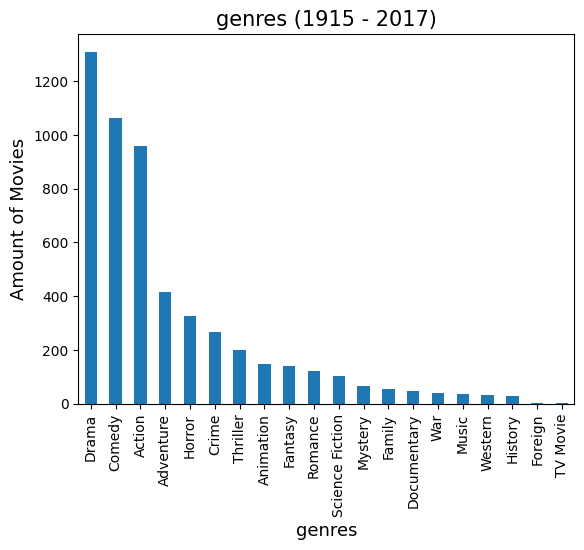

In [5]:
an.plot_genre(data,'genres')

### Hvilken genre opnår den størst gennemsnitlige indtjening?

,revenue
genres,
Animation,2.408561e+08
Family,2.406010e+08
Adventure,1.987482e+08
Science Fiction,1.665982e+08
Fantasy,1.327448e+08
Action,1.234665e+08
Thriller,7.473545e+07
Romance,7.012801e+07
History,6.766593e+07


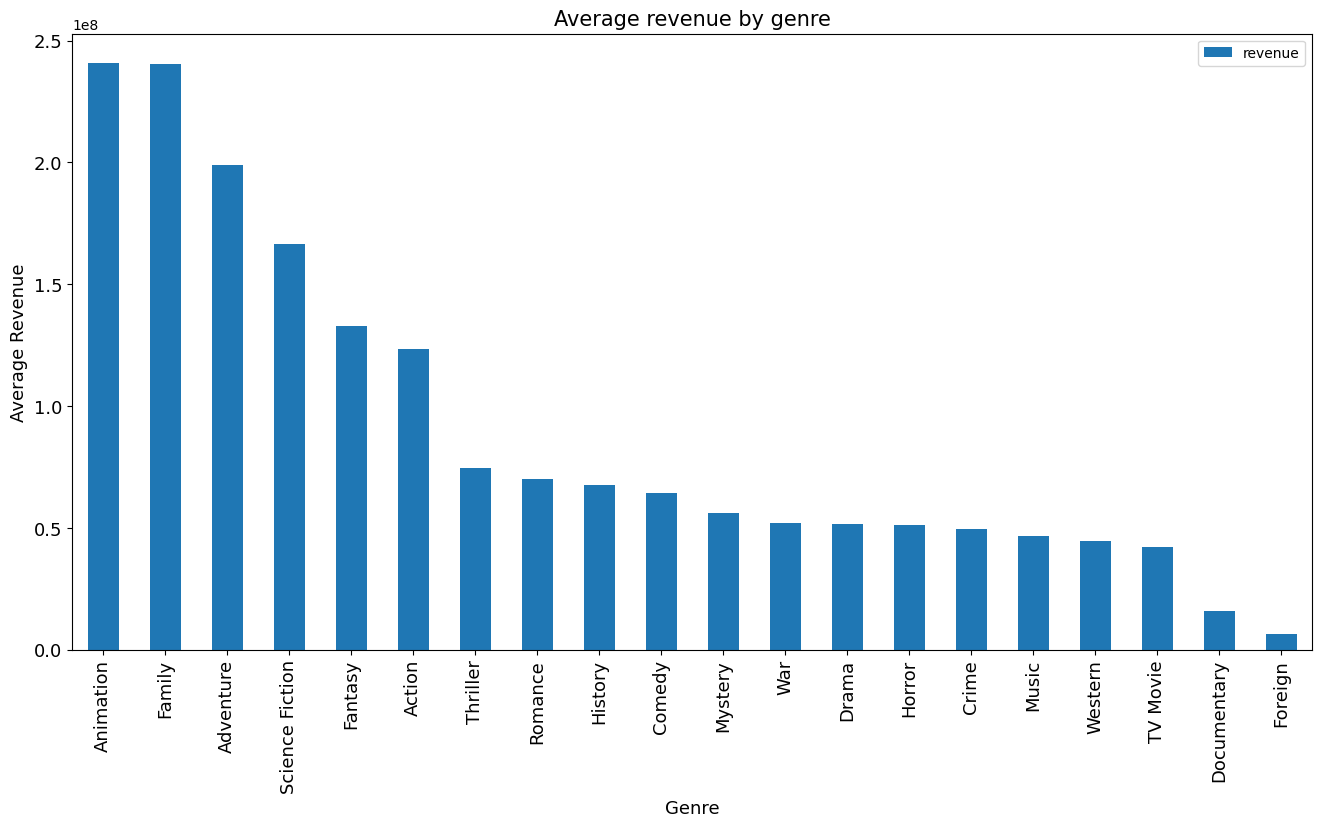

In [6]:
an.plot_average_revenue_by_genre(data)
an.average_revenue_by_genre(data)

### Hvilken genre opnår den størst gennemsnitlige rating?

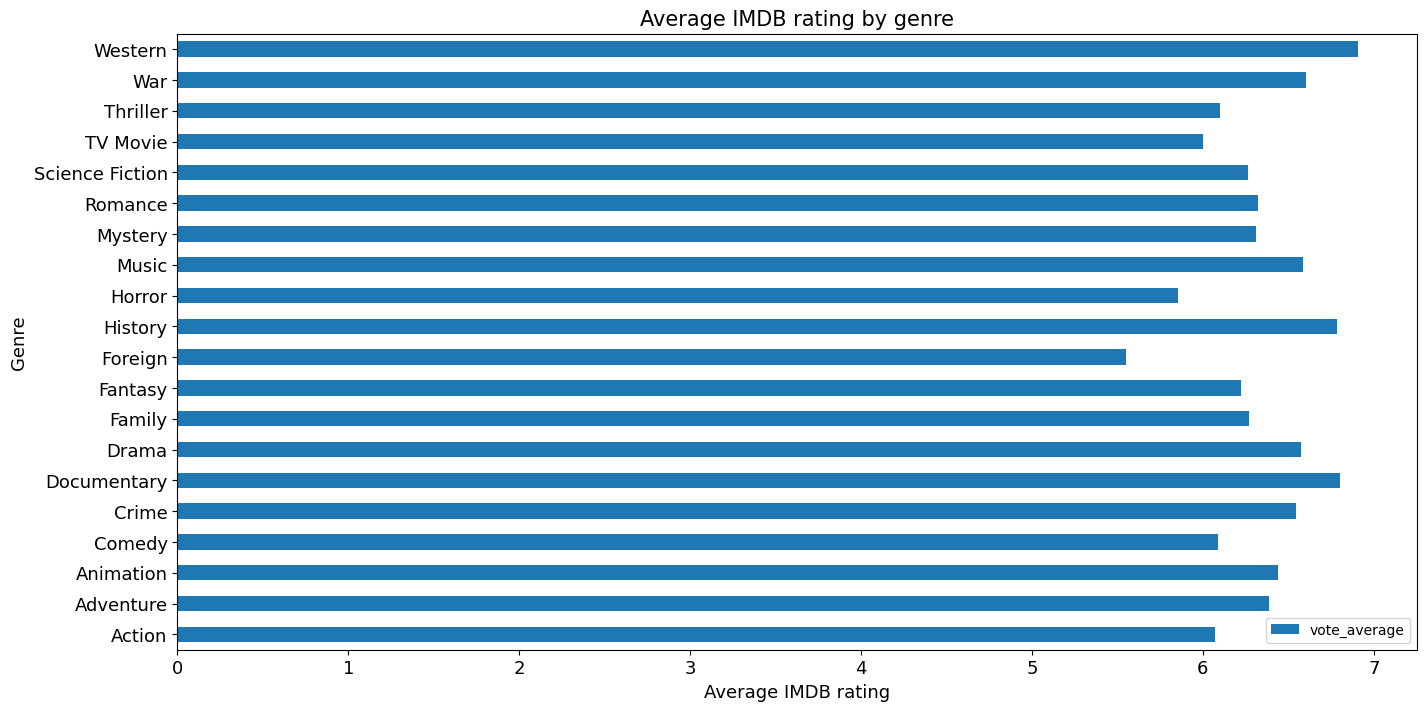

In [7]:
an.plot_average_ratings_by_genre(data)

# Production Companies

### Hvilke production companies har lavet flest film?

Shape: (5362, 2)
                        production_companies  movies
874                       Paramount Pictures     336
1248                      Universal Pictures     329
1231  Twentieth Century Fox Film Corporation     247
257                        Columbia Pictures     209
798                          New Line Cinema     164


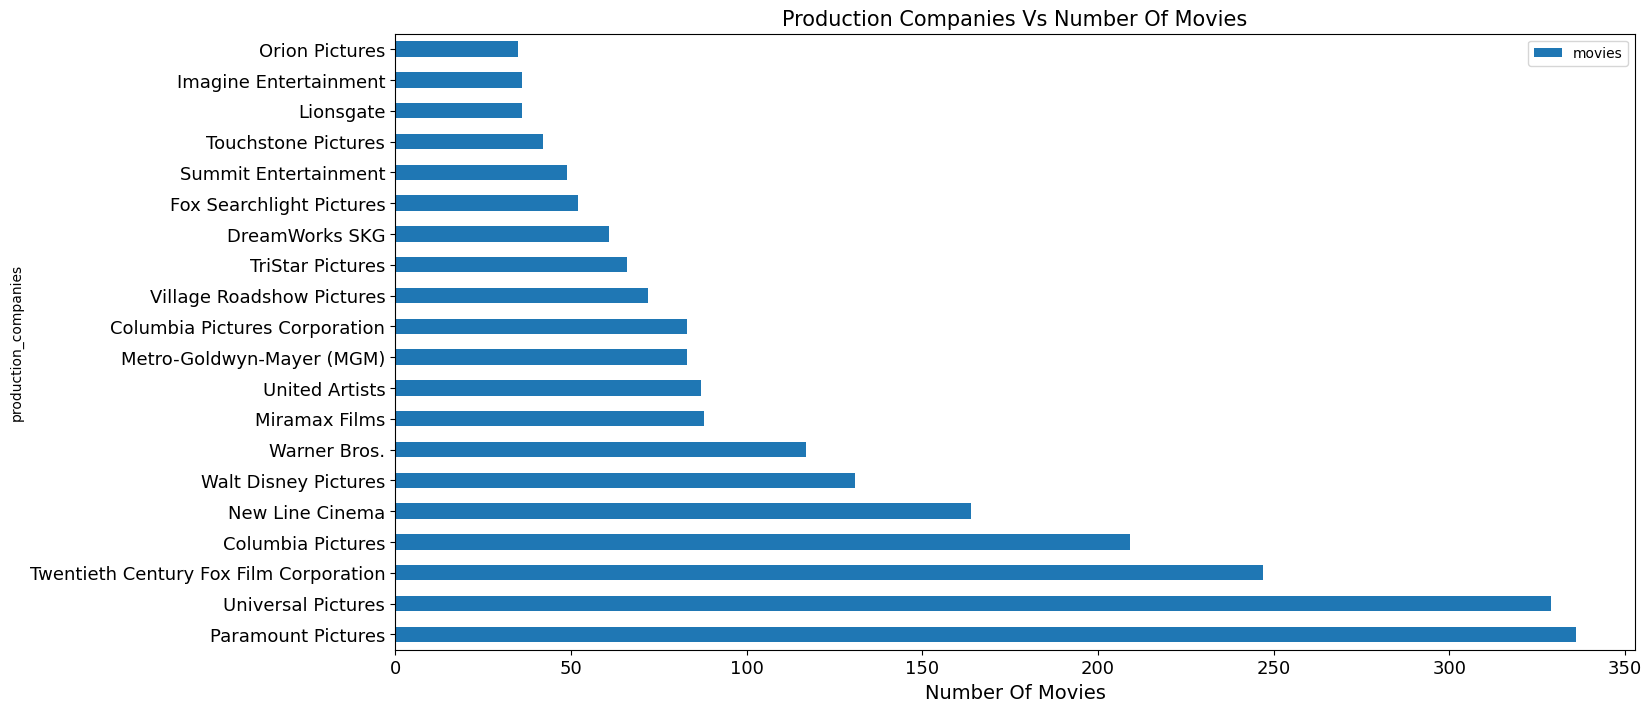

In [8]:
an.plot_production_company(data)

### Hvilket production companies har den største indtjening?

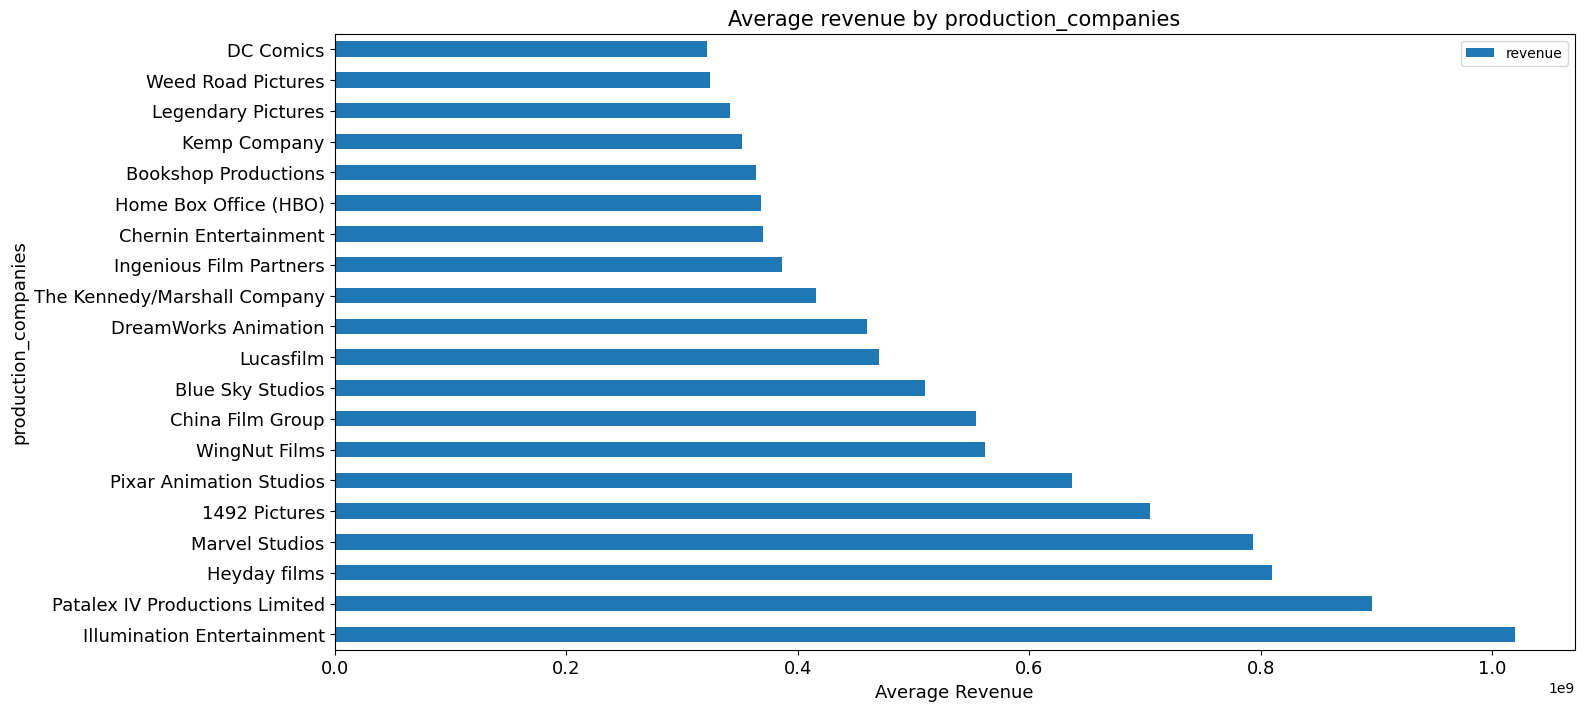

In [9]:
an.plot_average_revenue_by_prod(data)

# Linear Regression

### Er der en sammenhæng mellem en films budget og dens revenue? (Undersøg med linear regression)


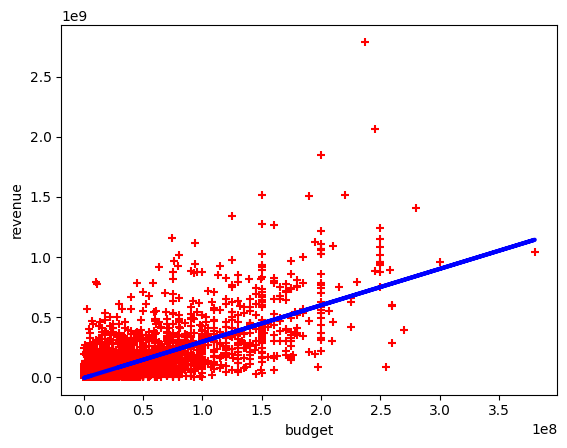

In [10]:
# shows linear regression plot
an.linear_regression_func(data,'budget','revenue')

In [11]:
# how strong is the linear relation between the budget and revenue?
an.correlator(data, 'budget','revenue')

Correlation between budget and revenue  is:  0.7299914747137753


C:\Users\miemt\Desktop\MovieMatch\modules\analyser\Analyser.py:60: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_corr = df.corr()


In [12]:
# predict the revenue and proft for a 3.000.000 dollar movie-budget
budget = 3000000
predict_revenue = an.revenue_predict(data,'budget','revenue', budget)
print("Predicted revenue: {}".format(round(predict_revenue, ndigits=2)))
profit = predict_revenue - budget
print("Predicted profit: {}".format(round(profit, ndigits=2)))

Predicted revenue: 5483163.09
Predicted profit: 2483163.09


### Er der en sammenhæng mellem vote-average og profit? (Undersøg med linear regression)

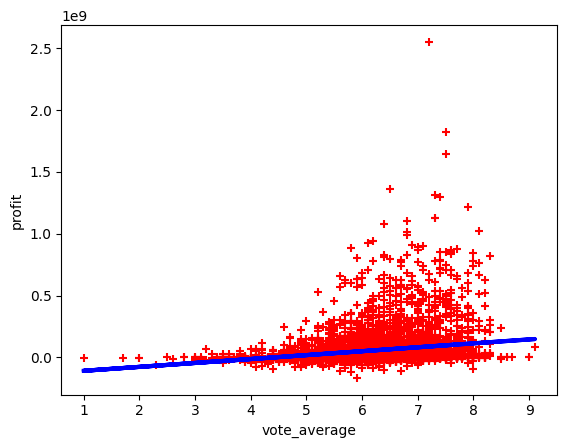

In [13]:
# shows linear regression plot
an.linear_regression_func(data,'vote_average','profit')

In [14]:
# how strong is the linear relation between the vote average and revenue?
an.correlator(data,'vote_average','profit')

Correlation between vote_average and profit  is:  0.2034004786336866


C:\Users\miemt\Desktop\MovieMatch\modules\analyser\Analyser.py:60: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_corr = df.corr()


# Heatmap

### Undersøg med et heatmap, hvilke features som har den bedste sammenhæng.

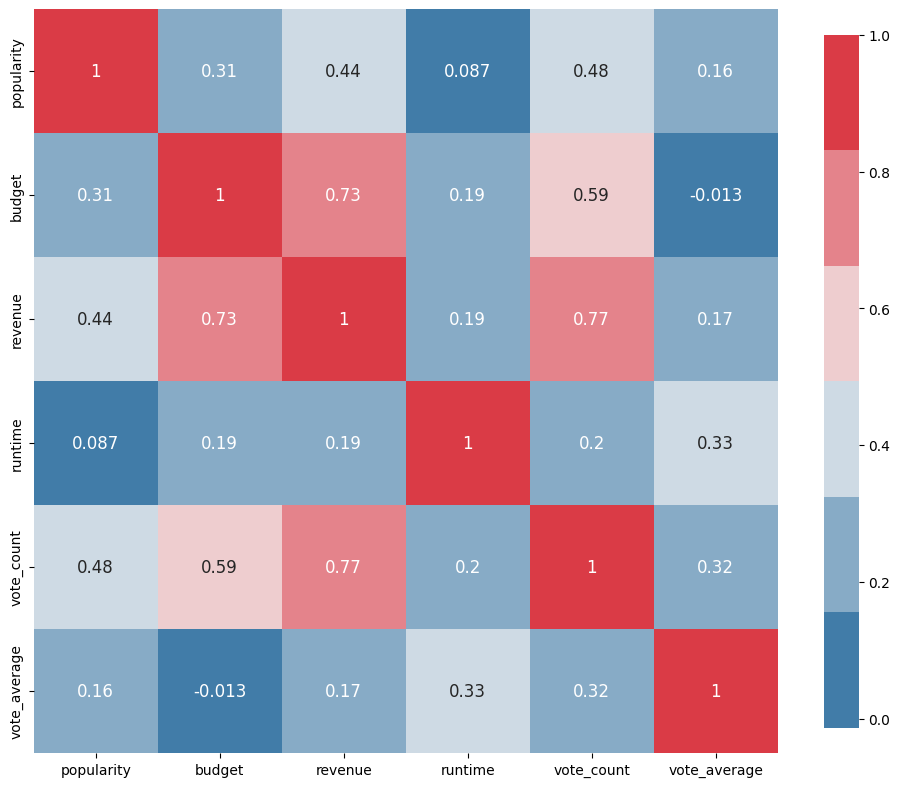

In [15]:
an.plot_correlation_map(data[['popularity','budget','revenue','runtime','vote_count','vote_average']])

# Average revenue by month

### Undersøg hvornår en film bliver udgivet på året i forhold til hvor stor indtjening filmen får? Hvilke måned er bedst at udgive en film?

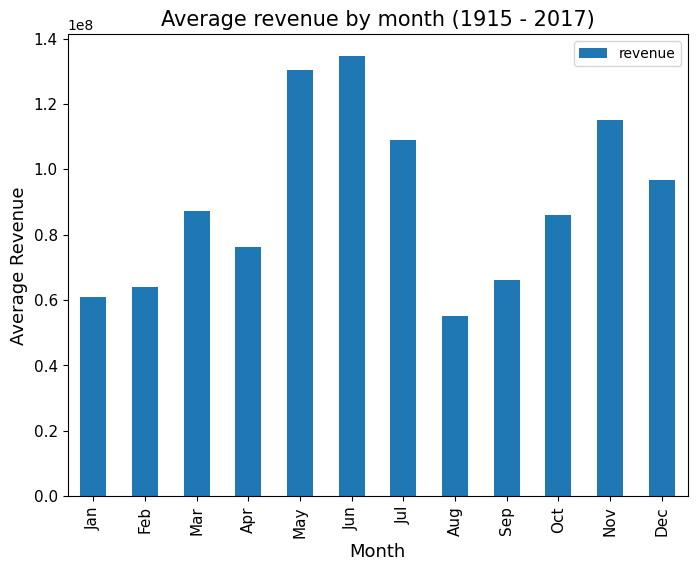

In [16]:
an.average_revenue_by_month(data)

# Vote average by year

### Undersøg udvikling i vote-average fra 2000 til 2017.

In [17]:
data.release_date.describe()

C:\Users\miemt\AppData\Local\Temp\ipykernel_3132\4183909318.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  data.release_date.describe()


count                    5362
unique                   3820
top       2010-10-09 00:00:00
freq                        7
first     1915-08-02 00:00:00
last      2017-12-05 00:00:00
Name: release_date, dtype: object

C:\Users\miemt\Desktop\MovieMatch\modules\analyser\Analyser.py:183: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df[(df['years'] < year2) & (df['years'] >= year1)].groupby(by='years').mean()['vote_average'].plot()


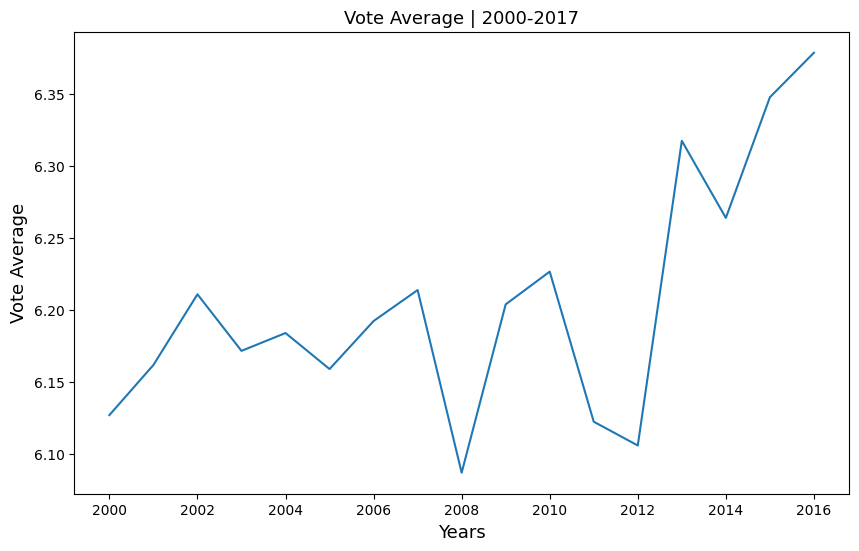

In [18]:
an.plot_vote_average_by_years(data,2000,2017)